In [1]:
%matplotlib inline

In [2]:
from ia_kernels import normalized_vectors
npts_source_gals = int(1e4)
source_e1 = normalized_vectors(np.random.random((npts_source_gals, 3)))

In [3]:
from ia_kernels import random_perpendicular_directions
source_e2 = random_perpendicular_directions(source_e1)

In [4]:
from ia_kernels import vectors_normal_to_planes
source_e3 = vectors_normal_to_planes(source_e1, source_e2)

In [5]:
npts_target_halos = int(1e6)
target_halos_e1 = normalized_vectors(np.random.random((npts_target_halos, 3)))

In [6]:
from ia_kernels import random_partially_aligned_vectors
# target_alignment_angle = random_partially_aligned_vectors(target_halos_e1, 0.25)

# from ia_kernels import angles_between_list_of_vectors
# angles = angles_between_list_of_vectors(target_halos_e1, target_alignment_angle)
# directions = vectors_normal_to_planes(target_halos_e1, target_alignment_angle)

# from ia_kernels import rotation_matrices
# matrices = rotation_matrices(angles, directions)

# from ia_kernels import rotate_vector_collection

# vector_should_equal_target_alignment_angle = rotate_vector_collection(matrices, target_halos_e1)
# test_angles = angles_between_list_of_vectors(vector_should_equal_target_alignment_angle, target_alignment_angle)
# assert np.allclose(test_angles, 0.0, atol=0.001)

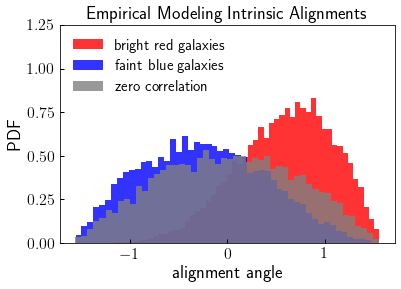

In [13]:
import ia_kernels
__=reload(ia_kernels)

x_axes = np.tile((1, 0, 0), npts_source_gals).reshape((npts_source_gals, 3))
z_axes = np.tile((0, 0, 1), npts_source_gals).reshape((npts_source_gals, 3))

random_axes1 = ia_kernels.axes_correlated_with_z(np.ones(npts_source_gals))
random_axes2 = ia_kernels.axes_correlated_with_z(np.zeros(npts_source_gals)-3.)
random_axes3 = ia_kernels.axes_correlated_with_z(np.zeros(npts_source_gals)+1.5)

from ia_kernels import angles_between_list_of_vectors
angles = angles_between_list_of_vectors(random_axes1, z_axes)
angles2 = angles_between_list_of_vectors(random_axes2, z_axes)
angles3 = angles_between_list_of_vectors(random_axes3, z_axes)

fig, ax = plt.subplots(1, 1)

__=ax.hist(angles2-np.pi/2., bins=50, alpha=0.8, label='bright red galaxies', normed=True, color='red')
__=ax.hist(angles3-np.pi/2., bins=50, alpha=0.8, label='faint blue galaxies', normed=True, color='blue')
__=ax.hist(angles-np.pi/2., bins=50, alpha=0.8, label='zero correlation', normed=True, color='gray')

legend = ax.legend()
ylim = ax.set_ylim(0, 1.25)
title = ax.set_title('Empirical Modeling Intrinsic Alignments')
xlabel = ax.set_xlabel(r'alignment angle')
ylabel = ax.set_ylabel(r'PDF')

# figname = 'empirical_alignment_demo.pdf'
# fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

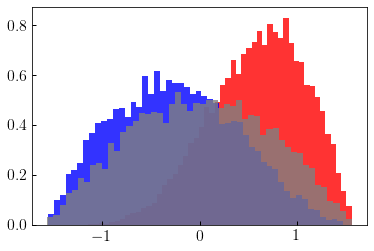

In [31]:
desired_correlation_axes = ia_kernels.normalized_vectors(np.random.random((npts_source_gals, 3)))

angles1a = angles_between_list_of_vectors(z_axes, desired_correlation_axes)
angles2a = angles_between_list_of_vectors(z_axes, desired_correlation_axes)
angles3a = angles_between_list_of_vectors(z_axes, desired_correlation_axes)

rotation_axes1 = vectors_normal_to_planes(z_axes, desired_correlation_axes)
rotation_axes2 = vectors_normal_to_planes(z_axes, desired_correlation_axes)
rotation_axes3 = vectors_normal_to_planes(z_axes, desired_correlation_axes)

matrices1 = ia_kernels.rotation_matrices(angles1a, rotation_axes1)
matrices2 = ia_kernels.rotation_matrices(angles2a, rotation_axes2)
matrices3 = ia_kernels.rotation_matrices(angles3a, rotation_axes3)

final_axes1 = ia_kernels.rotate_vector_collection(matrices1, random_axes1)
final_axes2 = ia_kernels.rotate_vector_collection(matrices2, random_axes2)
final_axes3 = ia_kernels.rotate_vector_collection(matrices3, random_axes3)

final_angles1 = angles_between_list_of_vectors(final_axes1, desired_correlation_axes)
final_angles2 = angles_between_list_of_vectors(final_axes2, desired_correlation_axes)
final_angles3 = angles_between_list_of_vectors(final_axes3, desired_correlation_axes)

fig, ax = plt.subplots(1, 1)

__=ax.hist(final_angles2-np.pi/2., bins=50, alpha=0.8, label='bright red galaxies', normed=True, color='red')
__=ax.hist(final_angles3-np.pi/2., bins=50, alpha=0.8, label='faint blue galaxies', normed=True, color='blue')
__=ax.hist(final_angles1-np.pi/2., bins=50, alpha=0.8, label='zero correlation', normed=True, color='gray')


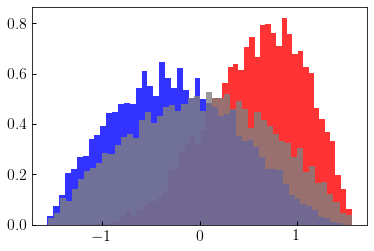

In [35]:
__=reload(ia_kernels)

correlation_axes = ia_kernels.normalized_vectors(np.random.random((npts_source_gals, 3)))

axes1 = ia_kernels.axes_correlated_with_input_vector(correlation_axes, np.ones(npts_source_gals))
axes2 = ia_kernels.axes_correlated_with_input_vector(correlation_axes, np.zeros(npts_source_gals)-3.)
axes3 = ia_kernels.axes_correlated_with_input_vector(correlation_axes, np.zeros(npts_source_gals)+1.5)

final_angles1 = ia_kernels.angles_between_list_of_vectors(axes1, correlation_axes)
final_angles2 = ia_kernels.angles_between_list_of_vectors(axes2, correlation_axes)
final_angles3 = ia_kernels.angles_between_list_of_vectors(axes3, correlation_axes)

fig, ax = plt.subplots(1, 1)

__=ax.hist(final_angles2-np.pi/2., bins=50, alpha=0.8, label='bright red galaxies', normed=True, color='red')
__=ax.hist(final_angles3-np.pi/2., bins=50, alpha=0.8, label='faint blue galaxies', normed=True, color='blue')
__=ax.hist(final_angles1-np.pi/2., bins=50, alpha=0.8, label='zero correlation', normed=True, color='gray')


In [ ]:
import ia_models
__=reload(ia_models)

x_axes = np.tile((0, 0, 1), npts_source_gals).reshape((npts_source_gals, 3))
random_axes1 = ia_models.correlated_axes(powerlaw_indices=np.ones(npts_source_gals))
random_axes2 = ia_models.correlated_axes(powerlaw_indices=np.zeros(npts_source_gals)-3.)
random_axes3 = ia_models.correlated_axes(powerlaw_indices=np.zeros(npts_source_gals)+1.5)

from ia_kernels import angles_between_list_of_vectors
angles = angles_between_list_of_vectors(random_axes1, x_axes)
angles2 = angles_between_list_of_vectors(random_axes2, x_axes)
angles3 = angles_between_list_of_vectors(random_axes3, x_axes)

fig, ax = plt.subplots(1, 1)

__=ax.hist(angles2-np.pi/2., bins=50, alpha=0.8, label='bright red galaxies', normed=True, color='red')
__=ax.hist(angles3-np.pi/2., bins=50, alpha=0.8, label='faint blue galaxies', normed=True, color='blue')
__=ax.hist(angles-np.pi/2., bins=50, alpha=0.8, label='zero correlation', normed=True, color='gray')

legend = ax.legend()
ylim = ax.set_ylim(0, 1.25)
title = ax.set_title('Empirical Modeling Intrinsic Alignments')
xlabel = ax.set_xlabel(r'alignment angle')
ylabel = ax.set_ylabel(r'PDF')


In [ ]:
from astropy.utils.misc import NumpyRNGContext
from scipy.stats import powerlaw

def points_on_sphere(npts, index=1., seed=None, uran=False):

    with NumpyRNGContext(seed):
        phi = np.random.uniform(0, 2*np.pi, npts)

        if uran is True:
            cos_t = np.random.uniform(-1, 1, npts)
        else:
            uran1 = np.random.rand(npts)
            idx_is_negative = idx < 0
            cos_t = 2*powerlaw.isf(1-uran1, index) - 1.
        
    sin_t = np.sqrt((1.-cos_t*cos_t))

    x = sin_t * np.cos(phi)
    y = sin_t * np.sin(phi)
    z = cos_t

    return np.vstack((x, y, z)).T


In [ ]:
npts = int(1e5)

p0 = normalized_vectors(np.random.random((npts, 3)))

p1 = points_on_sphere(npts, uran=True)
p2 = points_on_sphere(npts, uran=False)
p3 = points_on_sphere(npts, uran=False, index=2.5)

angles1 = angles_between_list_of_vectors(p0, p1)
angles2 = angles_between_list_of_vectors(p0, p2)
angles3 = angles_between_list_of_vectors(p0, p3)

fig, ax = plt.subplots(1, 1)

__=ax.hist(angles1, bins=50, normed=True, alpha=0.8, label='zero alignment')
# __=ax.hist(angles2, bins=50, normed=True, alpha=0.8, label='alternate zero')
__=ax.hist(angles3, bins=50, normed=True, alpha=0.8, label='correlated alignment')

ylim = ax.set_ylim(0, 1)
leg = ax.legend()

In [ ]:
p1.shape

In [ ]:
p1

In [ ]:
npts = int(1e6)
v1 = np.random.random((npts, 3))
v2 = np.random.random((npts, 3))
random_angles = angles_between_list_of_vectors(v1, v2)

# from ia_kernels import elementwise_dot
# random_coeff = elementwise_dot(v1, v2)
# v3 = random_partially_aligned_vectors(v1, random_coeff)
# aligned_angles1 = angles_between_list_of_vectors(v1, v3)

uran = np.random.uniform(-1, 1, npts)
x = np.arccos(uran)

fig, ax = plt.subplots(1, 1)

__=ax.hist(angles, bins=50, normed=True, alpha=0.8, label='zero alignment')
# __=ax.hist(aligned_angles1, bins=50, normed=True, alpha=0.8, label='partial alignment')

leg = ax.legend()

In [ ]:
random_angles.min(), random_angles.mean(), random_angles.max()

In [ ]:
x.min(), x.mean(), x.max()

In [ ]:
angles_between_list_of_vectors((1, 0, 0), (-1, 0, 0))

In [ ]:
np.arccos(-1)

In [ ]:
np.dot((1, 0, 0), (-1, 0, 0))

In [ ]:
np.arccos?

In [ ]:
fig, ax = plt.subplots(1, 1)

x = 10*np.linspace(-np.pi, np.pi, 100)/np.pi
__=ax.plot(x/np.pi, np.cos(x))
__=ax.plot(x, np.zeros_like(x), '--', color='k')
xlim = ax.set_xlim(-2, 2)